In [42]:
import pandas as pd
import seaborn as sns
import cartopy
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

###### Reading in data as Pandas dataframe

In [48]:
df = pd.read_csv('Data_GA.csv')
df = df.drop(['FlightScheduledType', 'FlightTerminalType', 'FlightServiceType', 'IntentionalAct'], axis=1) # deleting columns with no data

# Creating column for months
months = np.zeros((len(df), 1))
for i in range(len(df)):
    try:    
        x = int(df.AccidentDate[i][0] + df.AccidentDate[i][1])
    except:
        x = int(df.AccidentDate[i][0])
    months[i,0] = x
df['AccidentMonth'] = months

df.head()

,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,HighestInjuryLevel,AircraftNumber,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightOperationType,DefiningEvent,PhaseOfFlight,AccidentMonth
0,GAA19CA118,AccidentReport,1/2/19,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,None,1,Substantial,Airplane,Part 91: General aviation,Instructional,Loss of Control on Ground,Landing,1.0
1,GAA19CA124,AccidentReport,1/2/19,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,Serious,1,Substantial,Helicopter,Part 91: General aviation,Aerial observation,Loss of Control In-Flight,Maneuvering,1.0
2,WPR19LA054,AccidentReport,1/2/19,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,Fatal,1,Substantial,Airplane,Part 91: General aviation,Personal,Abnormal Runway Contact,Landing,1.0
3,WPR19LA055,AccidentReport,1/2/19,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,Serious,1,Substantial,Airplane,Part 91: General aviation,Personal,Low Altitude Operation,Maneuvering,1.0
4,ERA19LA085,AccidentReport,1/3/19,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,None,1,Substantial,Airplane,Part 91: General aviation,Instructional,Fuel Related,Approach,1.0


In [49]:
print(df.dtypes) # property
print('===========')
print(df.info()) # method

NTSBNumber                         object
AccidentReport                     object
AccidentDate                       object
City                               object
StateOrRegion                      object
Country                            object
Latitude                          float64
Longitude                         float64
FatalInjuries                     float64
SeriousInjuries                   float64
HighestInjuryLevel                 object
AircraftNumber                      int64
DamageLevel                        object
AircraftCategory                   object
RegulationFlightConductedUnder     object
FlightOperationType                object
DefiningEvent                      object
PhaseOfFlight                      object
AccidentMonth                     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------         

## Generating Map

<IPython.core.display.Javascript object>


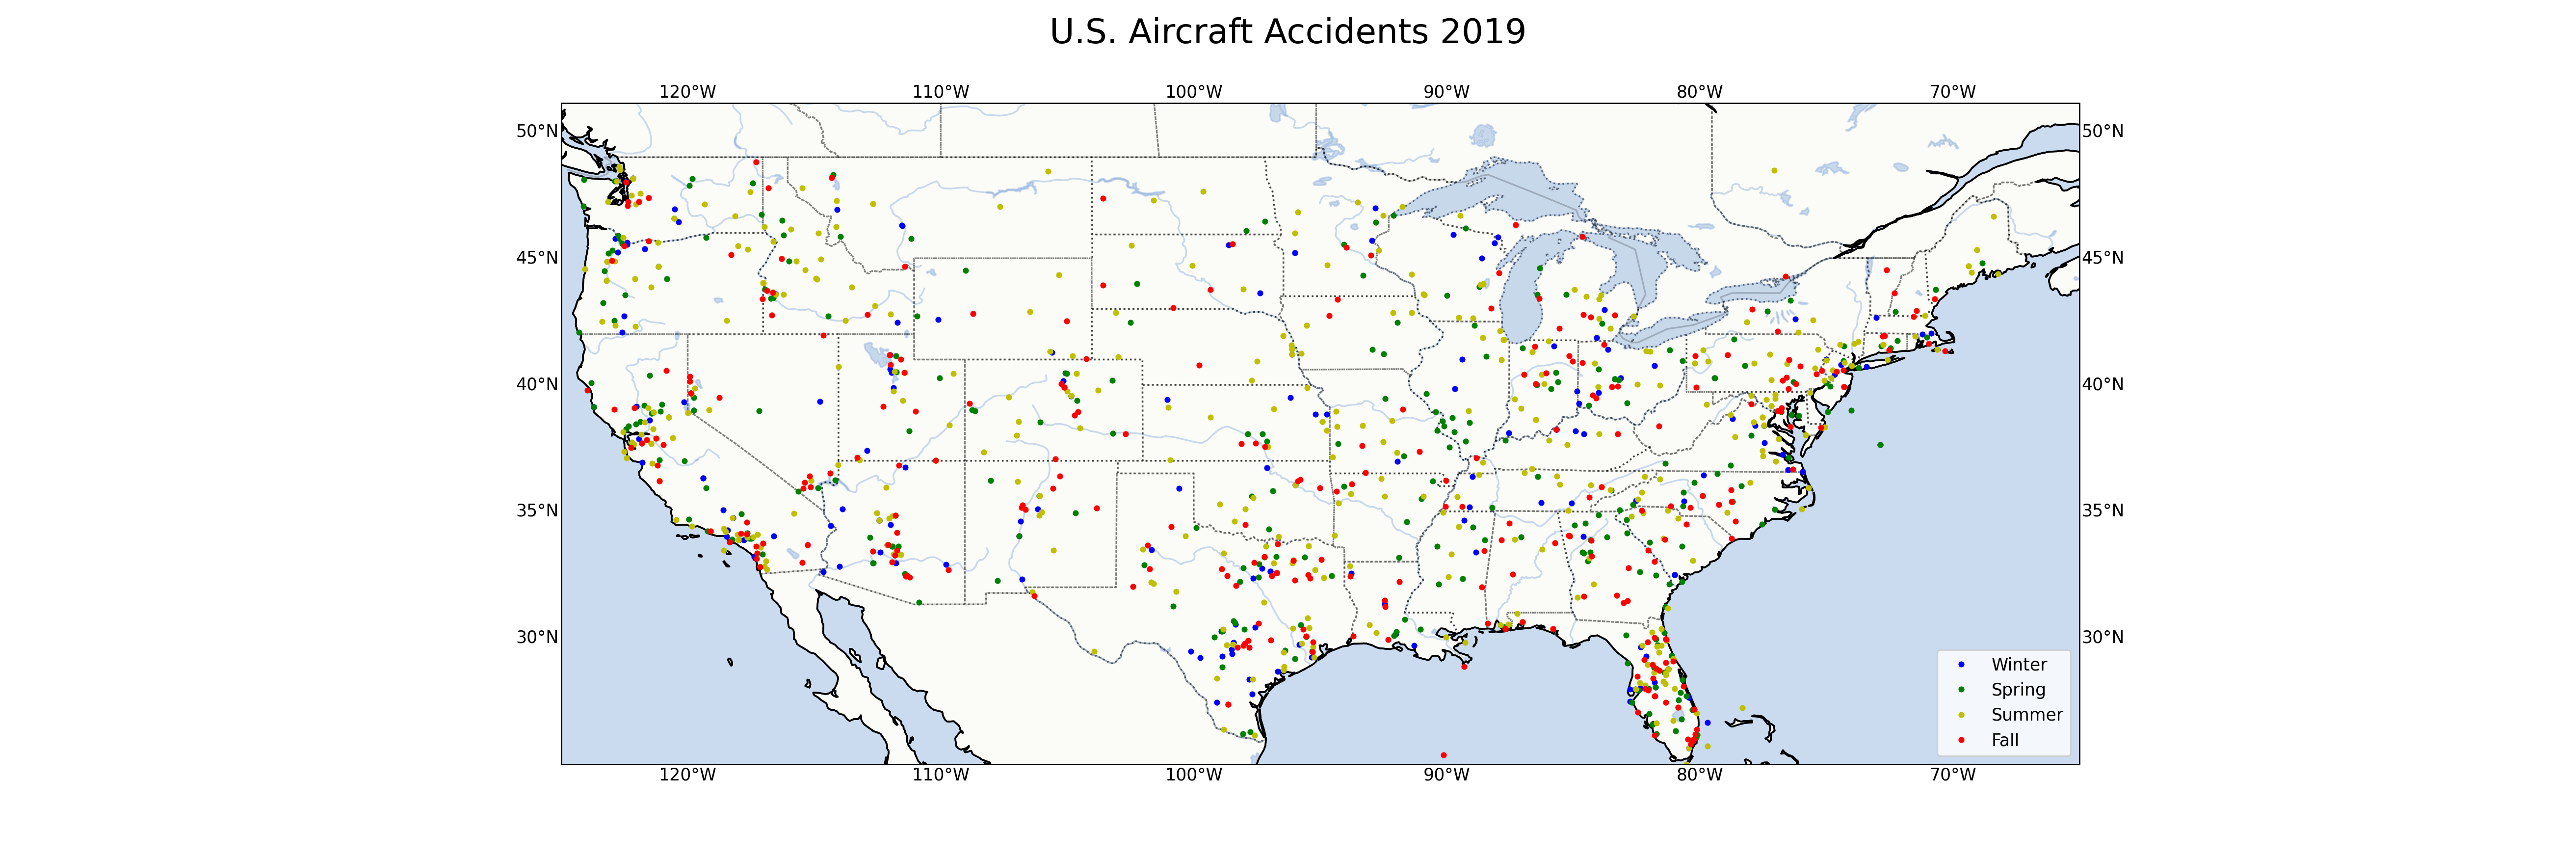

Text(0.5, 0.98, 'U.S. Aircraft Accidents 2019')

In [50]:
%matplotlib notebook
projection = ccrs.PlateCarree(); transform=ccrs.Geodetic()
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=projection)

months = np.zeros((len(df), 1))
for i in range(len(df)):
    try:    
        x = int(df.AccidentDate[i][0] + df.AccidentDate[i][1])
    except:
        x = int(df.AccidentDate[i][0])
    months[i,0] = x

# Winter
winter_1 = np.where(months >= 12)[0]; winter_2 = np.where(months <= 2)[0] 
ax.plot(df.Longitude[i], df.Latitude[i], 'ob', transform=transform, markersize=2.5, label='Winter')
for i in winter_1:
    ax.plot(df.Longitude[i], df.Latitude[i], 'ob', transform=transform, markersize=2.5)
for j in winter_2:
    ax.plot(df.Longitude[j], df.Latitude[j], 'ob', transform=transform, markersize=2.5)
winter = np.hstack((winter_1, winter_2))

# Spring
spring = np.where((months >= 3) & (months <= 5))[0]
ax.plot(df.Longitude[i], df.Latitude[i], 'og',transform=transform, markersize=2.5, label='Spring')
for i in spring:
    ax.plot(df.Longitude[i], df.Latitude[i], 'og', transform=transform, markersize=2.5)
    
# Summer
summer = np.where((months >= 6) & (months <= 8))[0]
ax.plot(df.Longitude[summer[0]], df.Latitude[summer[0]], 'oy', transform=transform, markersize=2.5, label='Summer')
for i in summer:
    ax.plot(df.Longitude[i], df.Latitude[i], 'oy', transform=transform, markersize=2.5)

# Fall
fall = np.where((months >= 9) & (months <= 11))[0]
ax.plot(df.Longitude[fall[0]], df.Latitude[fall[0]], 'or', transform=transform, markersize=2.5, label='Fall')
for i in fall:
    ax.plot(df.Longitude[i], df.Latitude[i], 'or', transform=transform, markersize=2.5)

    
ax.coastlines()
extent = (-125,-65, 47.5,25)
ax.set_extent(extent, crs=ccrs.Geodetic())
gl = ax.gridlines(crs=projection, draw_labels=True, linewidth=0)

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS, alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN, alpha=0.5)

ax.add_feature(cartopy.feature.STATES, alpha=0.5, ls=':')
ax.add_feature(cartopy.feature.BORDERS, alpha=0.2)
ax.add_feature(cartopy.feature.LAND, alpha=0.2)
ax.add_feature(cartopy.feature.COASTLINE)

plt.legend(loc='lower right')
plt.suptitle('U.S. Aircraft Accidents 2019', fontsize=20)

Map plots locations of aircraft accidents as a function of season. There is no clear seasonal variation discernable in the figure. However, it is evident that accidents appear to be more heavily concentrated in cities (e.g., Los Angeles, San Francisco, New York City). Florida appears to have the highest number of accidents proportional to its surface area.

## Assessing seasonal injury rates

<IPython.core.display.Javascript object>


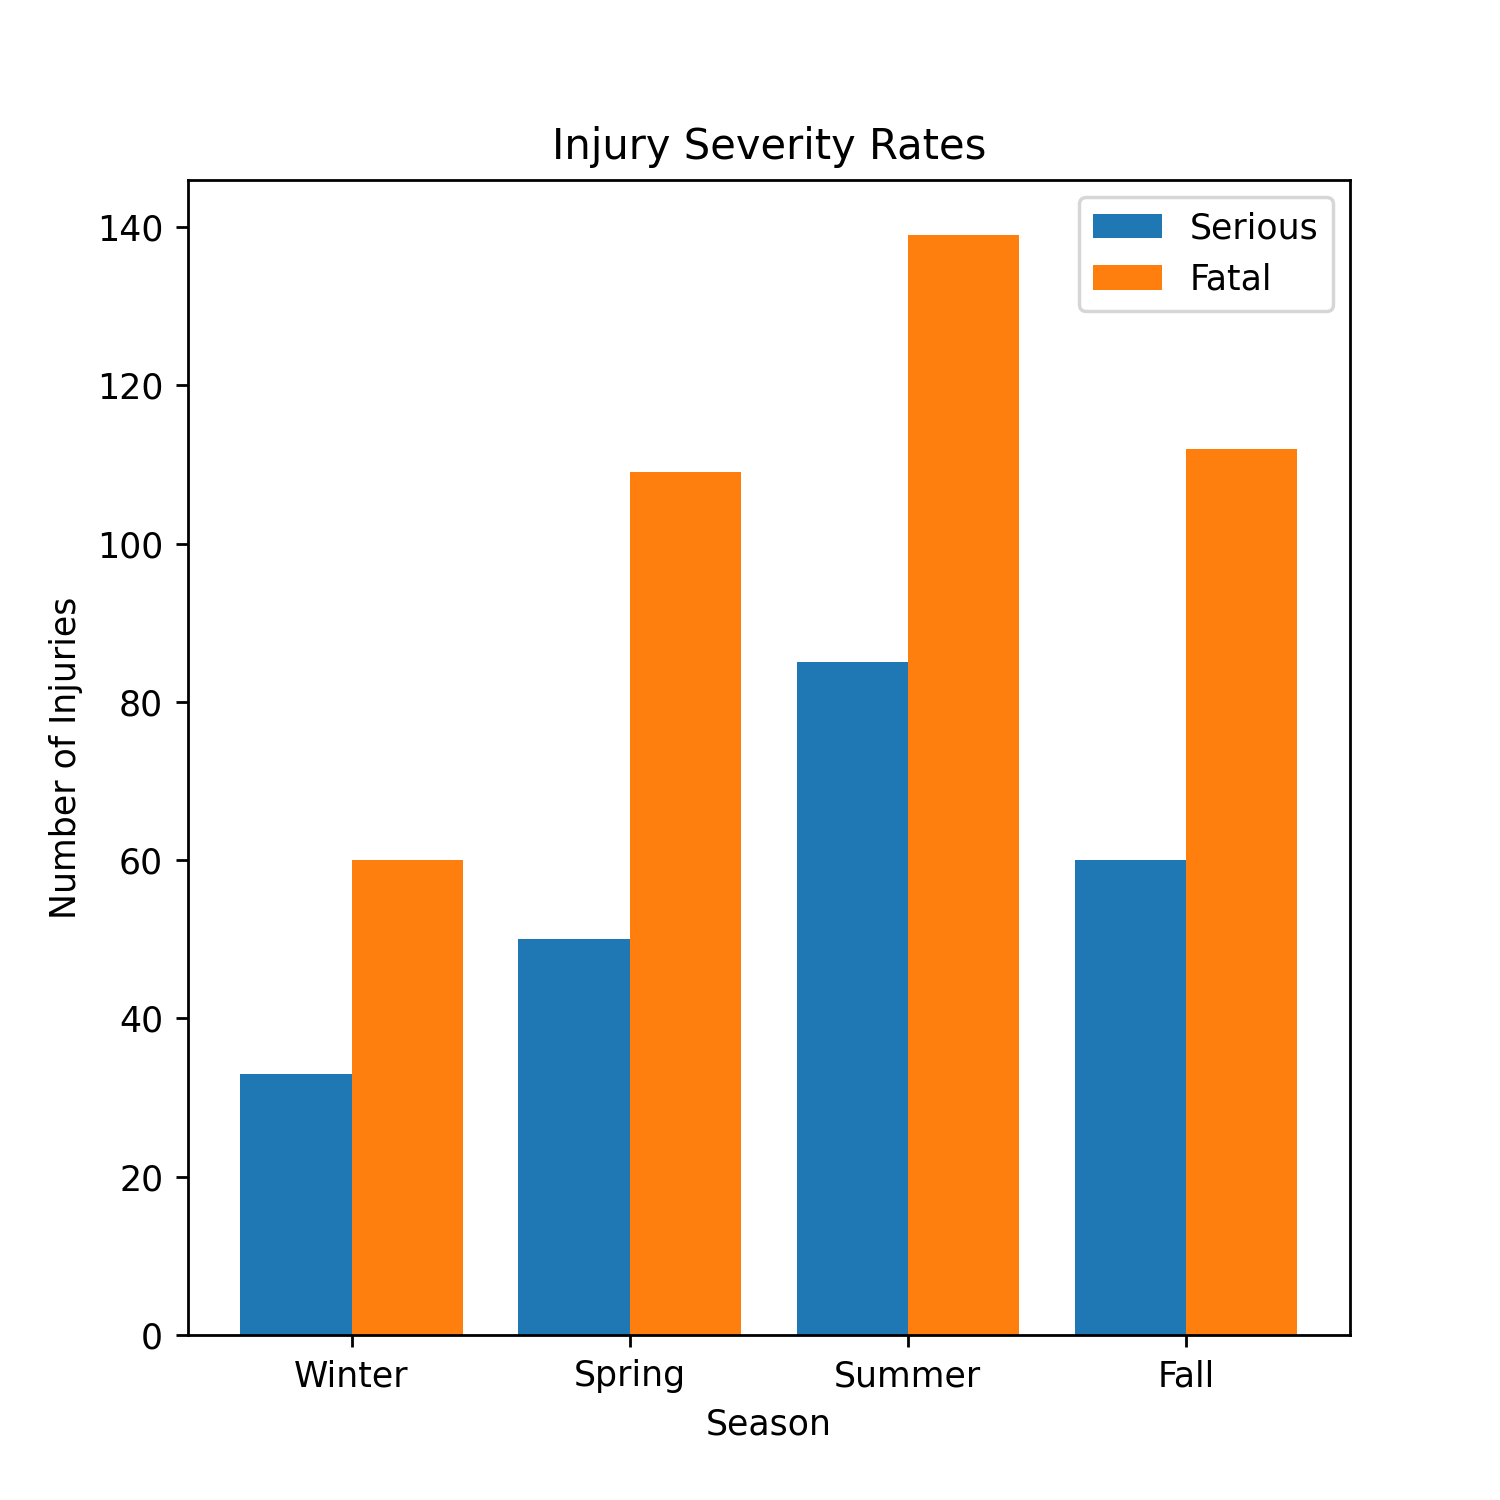

Text(0.5, 1.0, 'Injury Severity Rates')

In [51]:
%matplotlib notebook
# Make NaN values 0
df.FatalInjuries = df.FatalInjuries.fillna(0)

fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(1,1,1)

season = ['Winter', 'Spring', 'Summer', 'Fall']
x_axis = np.arange(len(season))

serious = [df.SeriousInjuries[winter].sum(), df.SeriousInjuries[spring].sum(), df.SeriousInjuries[summer].sum(), df.SeriousInjuries[fall].sum()]
fatal = [df.FatalInjuries[winter].sum(), df.FatalInjuries[spring].sum(), df.FatalInjuries[summer].sum(), df.FatalInjuries[fall].sum()]
plt.bar(x_axis-0.2, serious, 0.4, label='Serious')
plt.bar(x_axis+0.2, fatal, 0.4, label='Fatal')
plt.xticks(x_axis, season)
plt.xlabel('Season'); plt.ylabel('Number of Injuries')
plt.legend(loc='upper right')
plt.title('Injury Severity Rates')

## Assessing injury rates as a function of aircraft and phase of flight

<IPython.core.display.Javascript object>


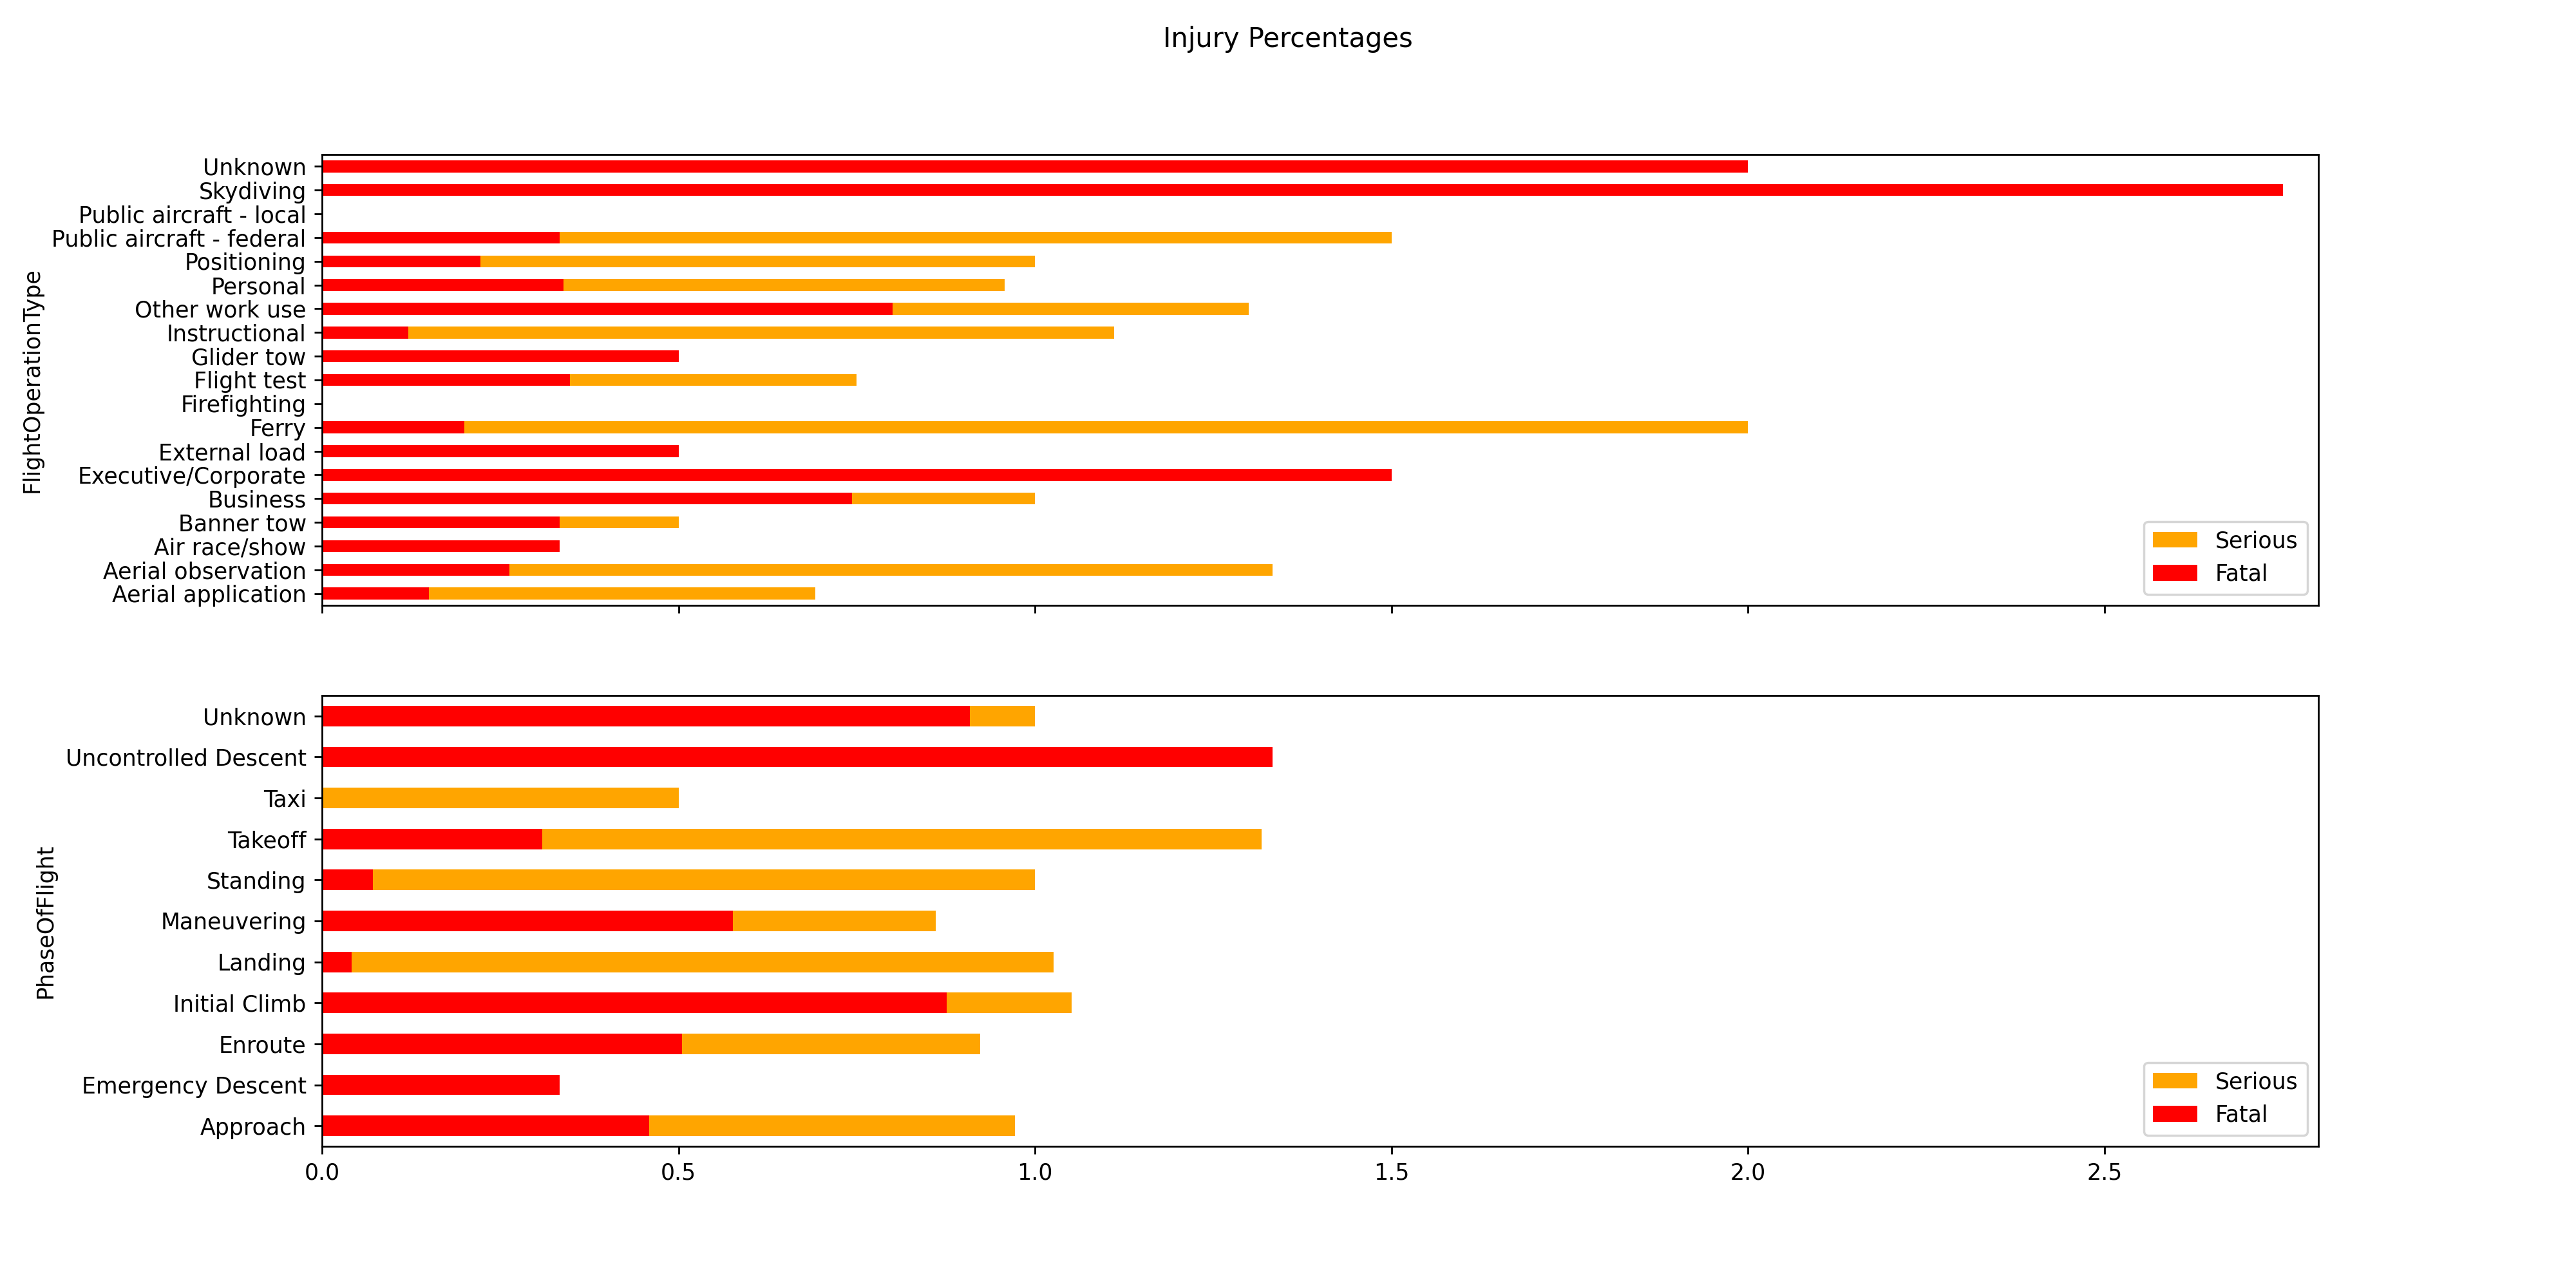

Text(0.5, 0.98, 'Injury Percentages')

In [116]:
%matplotlib notebook
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,1,1)

# Group the data
df_grouped = df.groupby(by=['FlightOperationType'])

# Mortality rates of each group
serious = df_grouped.SeriousInjuries.sum() / df_grouped.SeriousInjuries.count()
fatal = df_grouped.FatalInjuries.sum() / df_grouped.FatalInjuries.count()

# Plot in bar chart
serious.plot(kind='barh', color='orange', label='Serious')
fatal.plot(kind='barh', color='red', label='Fatal')
plt.xlim([0,2.8])
plt.legend(loc='lower right')

ax2 = fig.add_subplot(2,1,2, sharex=ax1)

df_grouped = df.groupby(by=['PhaseOfFlight'])

serious = df_grouped.SeriousInjuries.sum() / df_grouped.SeriousInjuries.count()
fatal = df_grouped.FatalInjuries.sum() / df_grouped.FatalInjuries.count()

serious.plot(kind='barh', color='orange', label='Serious')
fatal.plot(kind='barh', color='red', label='Fatal')
plt.legend(loc='lower right')

plt.suptitle('Injury Percentages')

###### Values can exceed 1 because multiple people can die per accident

<IPython.core.display.Javascript object>


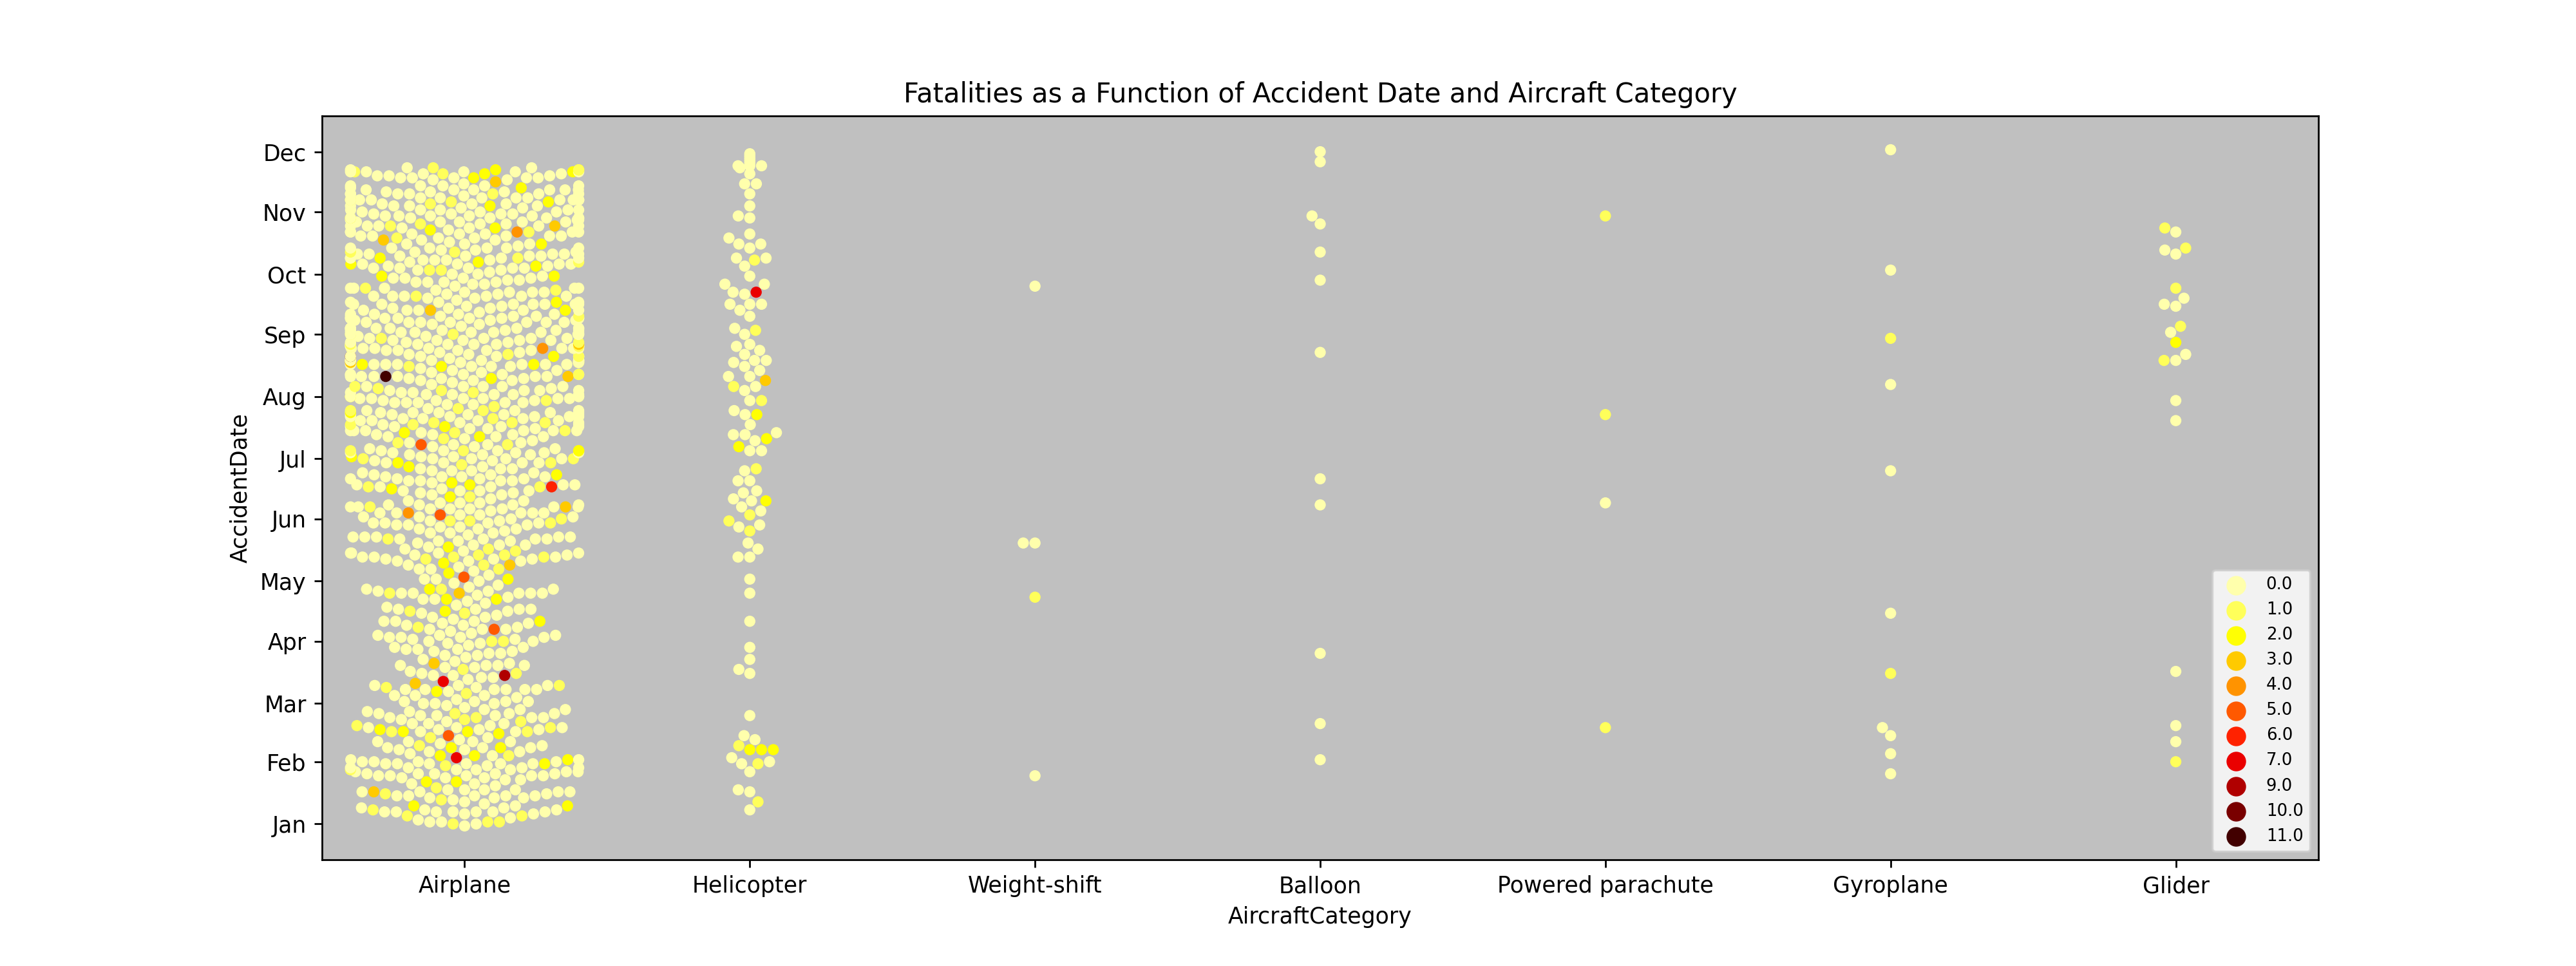

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Fatalities as a Function of Accident Date and Aircraft Category')

In [115]:
%matplotlib notebook

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)

sns.swarmplot(data=df, x='AircraftCategory', y='AccidentDate', hue='FatalInjuries', palette='hot_r')
ax1.set_facecolor('silver')
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

ax1.set_yticks(month_starts)
ax1.set_yticklabels(month_names)
plt.legend(loc='lower right', prop={'size': 7.5})
plt.title('Fatalities as a Function of Accident Date and Aircraft Category')

<IPython.core.display.Javascript object>


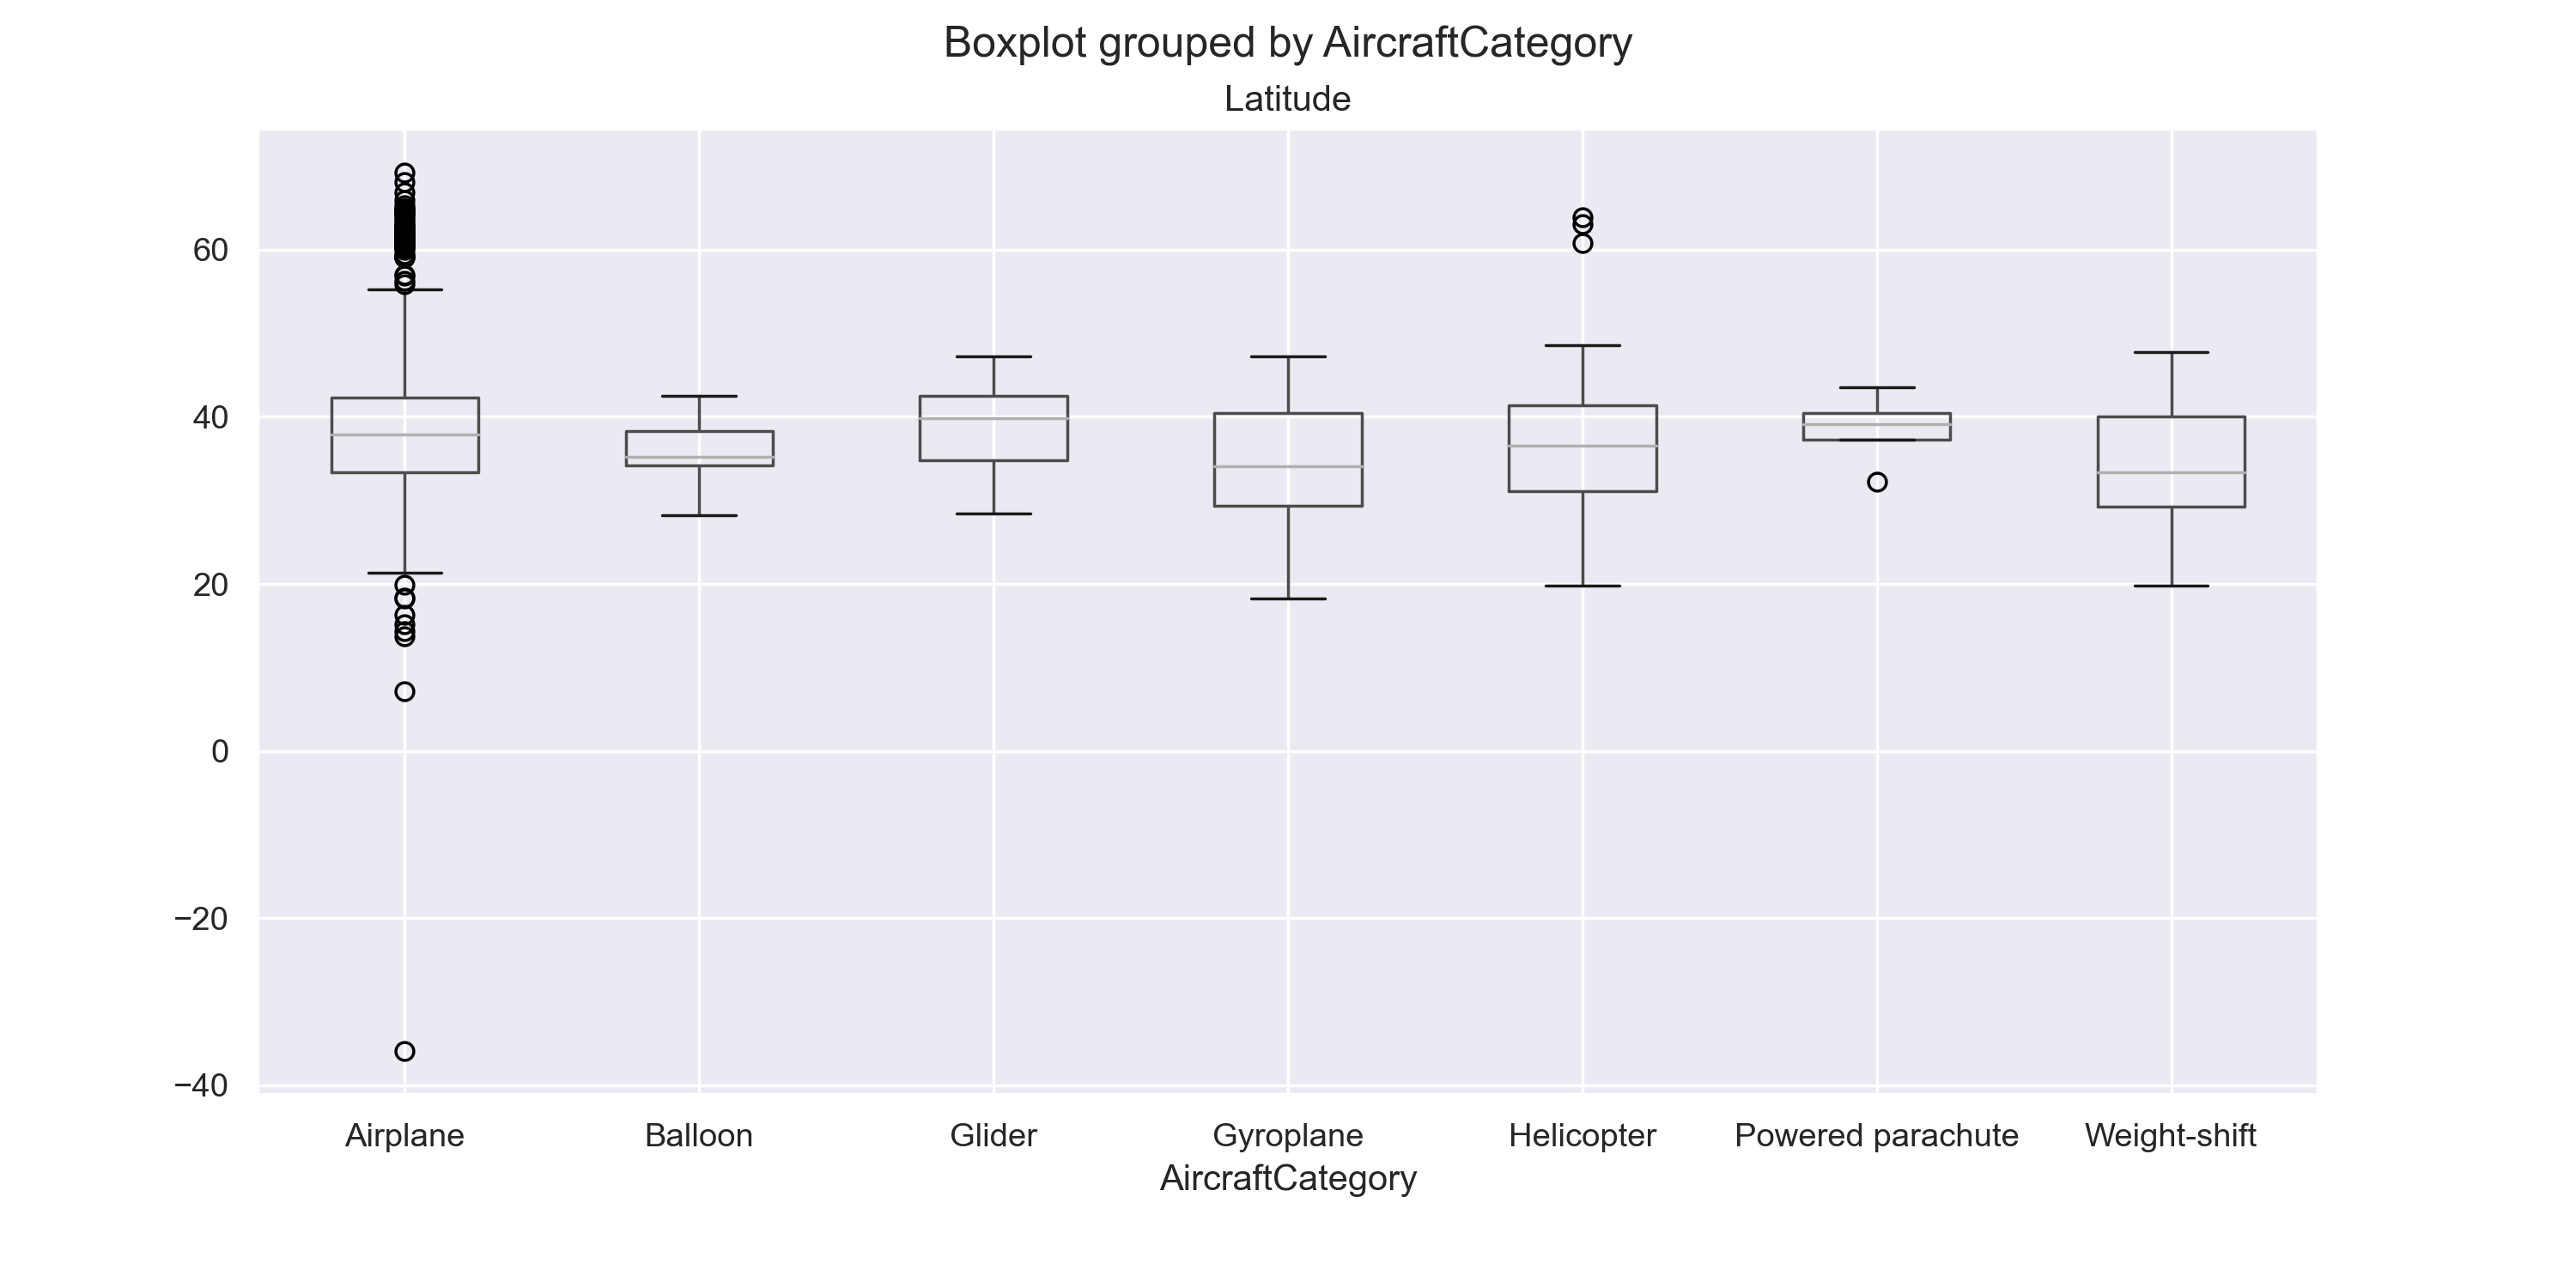

In [157]:
%matplotlib notebook
ax = df.boxplot(column='Latitude', by = 'AircraftCategory', figsize=(12,6)) # group by class

<IPython.core.display.Javascript object>


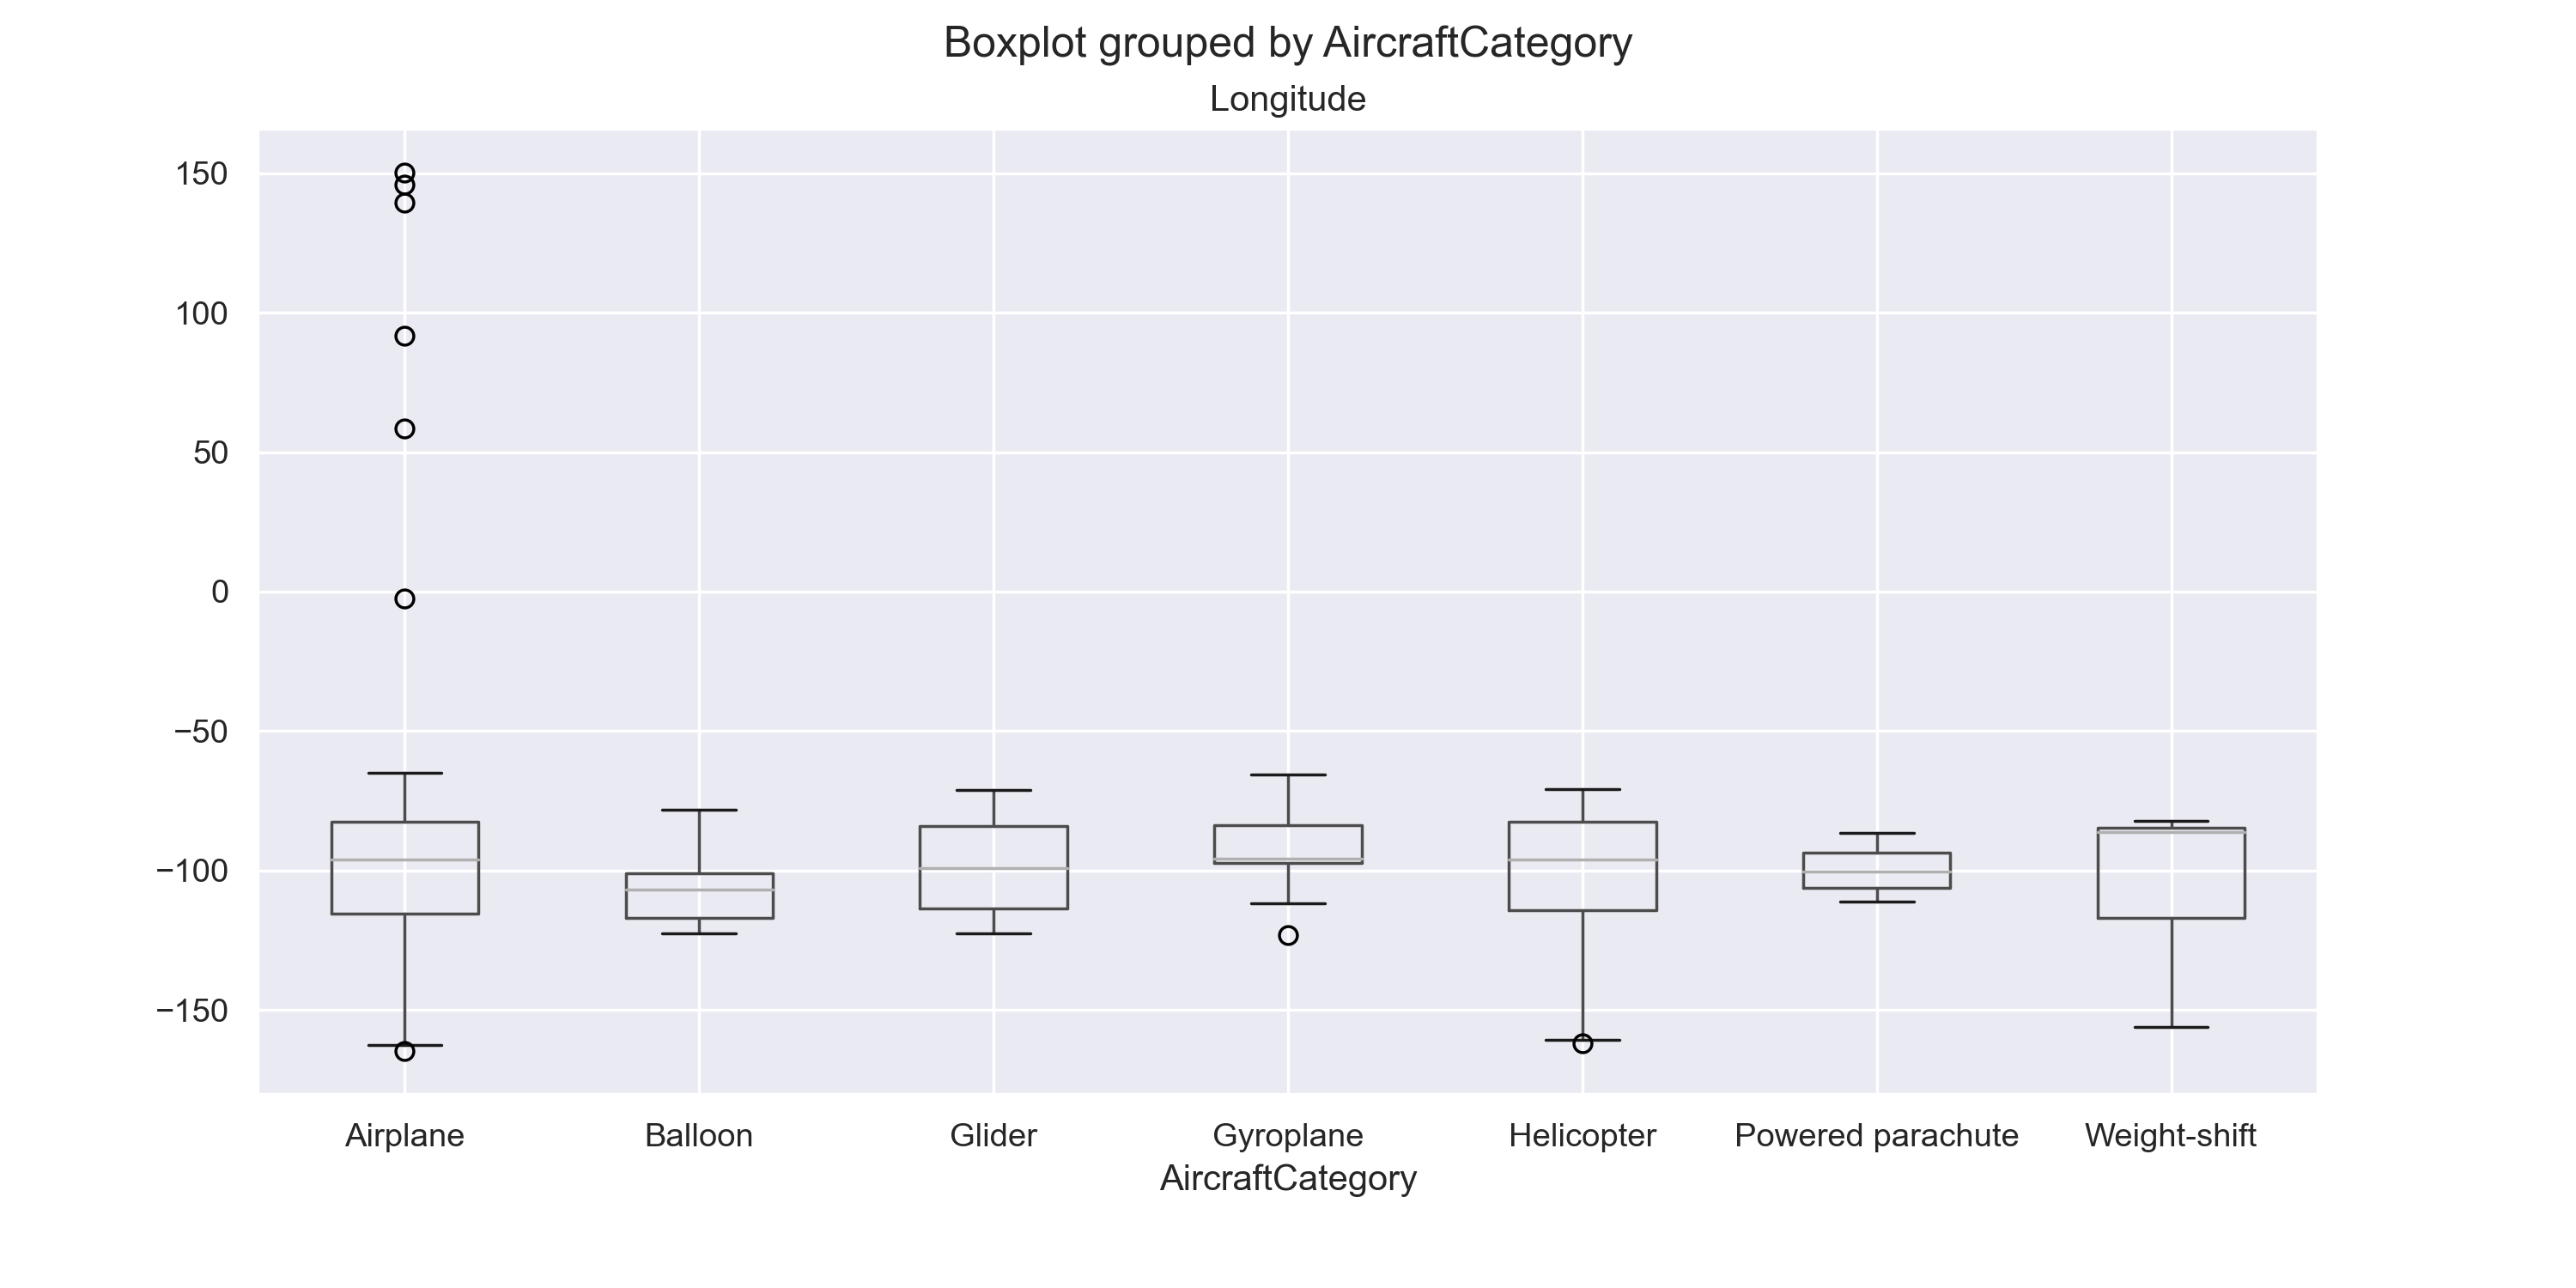

In [158]:
%matplotlib notebook
ax = df.boxplot(column='Longitude', by = 'AircraftCategory', figsize=(12,6)) # group by class